In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_files(root, num):
  xtilda =  []
  labels = []
  label = 0
  for i in range(1, (num*10)+1):
    pixels = plt.imread(root+str(i)+'.jpg')
    pixels = np.append(pixels, 1)
    xtilda.append(pixels)
    
    # labels are added according to the filenames 
    if(i%num == 0):
      label = (i//num)-1
    else:
      label = i//num

    labels.append(label)


  xtilda = np.array(xtilda)

  labels = np.array(labels)
  return xtilda, labels

In [3]:
def target_values(labels):
  t0=np.ones(labels.size)*-1
  t1=np.ones(labels.size)*-1
  t2=np.ones(labels.size)*-1
  t3=np.ones(labels.size)*-1
  t4=np.ones(labels.size)*-1
  t5=np.ones(labels.size)*-1
  t6=np.ones(labels.size)*-1
  t7=np.ones(labels.size)*-1
  t8=np.ones(labels.size)*-1
  t9=np.ones(labels.size)*-1
  
  for i in range(0, labels.size):
    if labels[i]==0:
      t0[i]=1
    elif labels[i]==1:
      t1[i]=1
    elif labels[i]==2:
      t2[i]=1
    elif labels[i]==3:
      t3[i]=1
    elif labels[i]==4:
      t4[i]=1
    elif labels[i]==5:
      t5[i]=1
    elif labels[i]==6:
      t6[i]=1
    elif labels[i]==7:
      t7[i]=1
    elif labels[i]==8:
      t8[i]=1
    elif labels[i]==9:
      t9[i]=1
  
  return t0, t1, t2, t3, t4, t5, t6, t7, t8, t9

# Problem 1

In [4]:
xtilda, labels = parse_files('C:\\Users\\Sarah\\Desktop\\Assignment2 ML\\Train\\', 240)
t0, t1, t2, t3, t4, t5, t6, t7, t8, t9 = target_values(labels)

In [5]:
def get_w(xtilda, t, lr):
    w = np.zeros(785)
    w[0]=1
    for i in range(1, 501):
        for j in range(0, len(xtilda)):
            if((np.dot(xtilda[j], w)*t[j])<0):
                w = w+ xtilda[j]*t[j]*lr    
    return w

In [6]:
t_values = [t0,t1,t2,t3,t4,t5,t6,t7,t8,t9]
lr_values = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
w_values = []
classifiers = []

# for each classifier
for i in range(0, 10):
#     get 10 w values
    lr = lr_values[i]
    w_values = []
    for j in range(0, 10):
        w = get_w(xtilda, t_values[j], lr)
        w_values.append(w)
    # w_values should have the shape(10,785) for w0,w1.....,w9 each of length 785
    w_values = np.array(w_values)
    # append the w_values for each classifier
    classifiers.append(w_values)
# classifiers should have the shape(10, 10, 785) where we have 10 Ws for each of the 10 classifiers    
classifiers = np.array(classifiers)           

In [7]:
classifiers.shape

(10, 10, 785)

In [8]:
def classify(xtilda, w_values):
  labels =[]
  for i in xtilda:
    l0 = np.dot(w_values[0].transpose(), i)
    l1 = np.dot(w_values[1].transpose(), i)
    l2 = np.dot(w_values[2].transpose(), i)
    l3 = np.dot(w_values[3].transpose(), i)
    l4 = np.dot(w_values[4].transpose(), i)
    l5 = np.dot(w_values[5].transpose(), i)
    l6 = np.dot(w_values[6].transpose(), i)
    l7 = np.dot(w_values[7].transpose(), i)
    l8 = np.dot(w_values[8].transpose(), i)
    l9 = np.dot(w_values[9].transpose(), i)
    
    values = [l0, l1, l2, l3, l4, l5, l6, l7, l8, l9]
    label = values.index(max(values))
    labels.append(label)
  labels = np.array(labels)
  return labels

In [9]:
def get_cm(true, predicted):
  n = np.unique(true).size
  cm = np.zeros(n*n).reshape(n, n)
  for i in range(0, true.size):
    cm[true[i]][predicted[i]]+=1
    
  cm = cm.astype(int)
  return cm

In [10]:
def plot_cm(cm, classes, name):

  fig, ax = plt.subplots(figsize=(10,10))
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  ax.figure.colorbar(im, ax=ax)
  # We want to show all ticks...
  ax.set(xticks=np.arange(cm.shape[1]),
         yticks=np.arange(cm.shape[0]),
         # ... and label them with the respective list entries
         xticklabels=classes, yticklabels=classes,
         title= name.split('.')[0],
         ylabel='True label',
         xlabel='Predicted label')
  ax.set_ylim(len(cm)-0.5, -0.5)

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
           rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], 'd'),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  plt.savefig(name + '.jpg')
  

In [11]:
x_test, true_labels = parse_files('C:\\Users\\Sarah\\Desktop\\Assignment2 ML\\Test\\', 20)

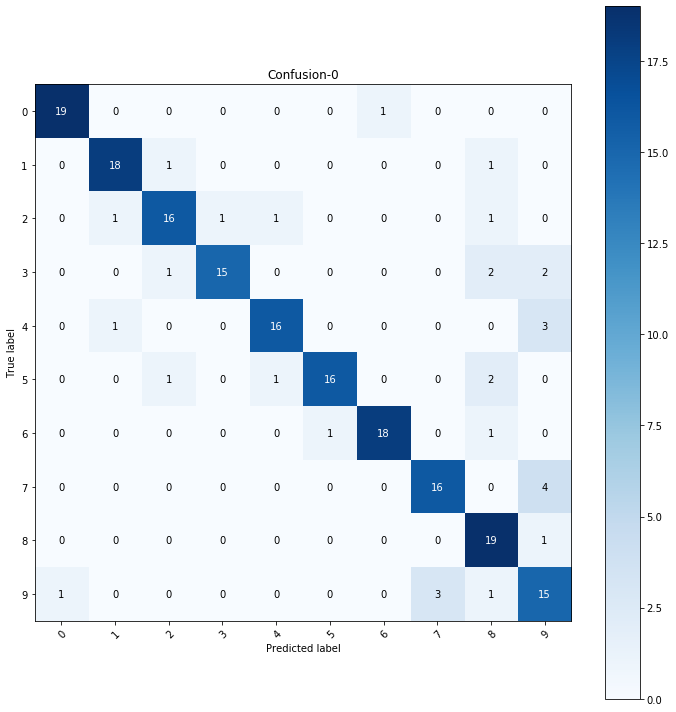

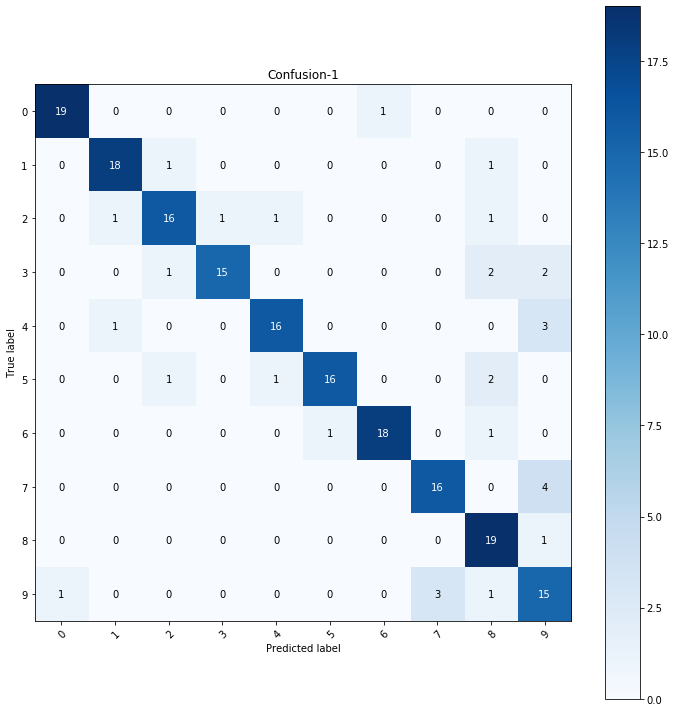

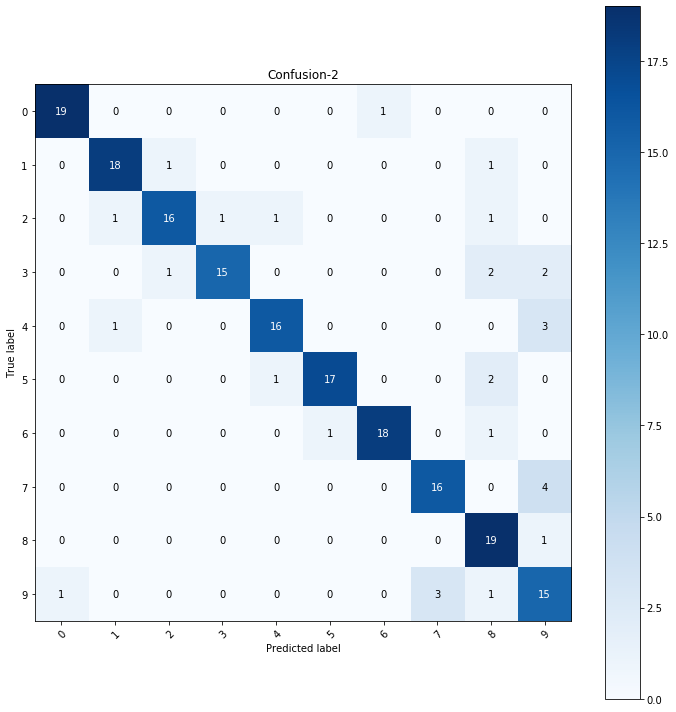

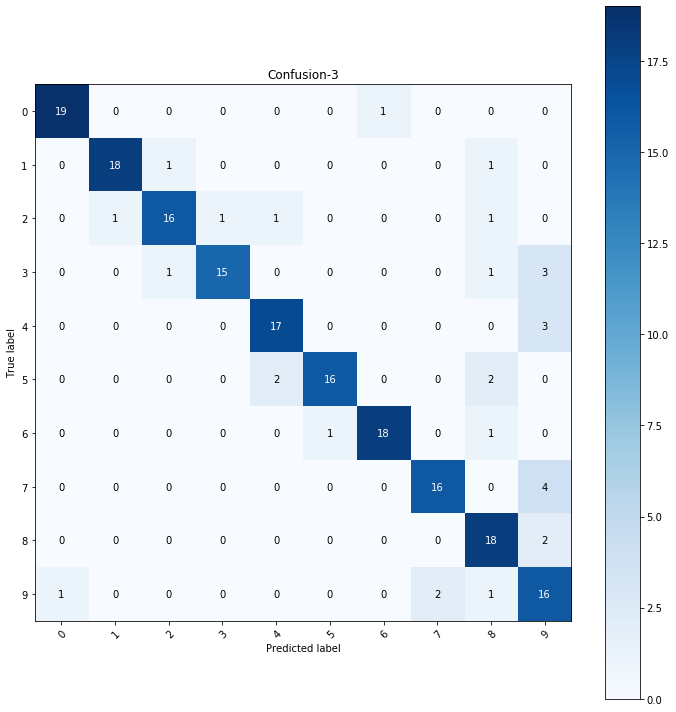

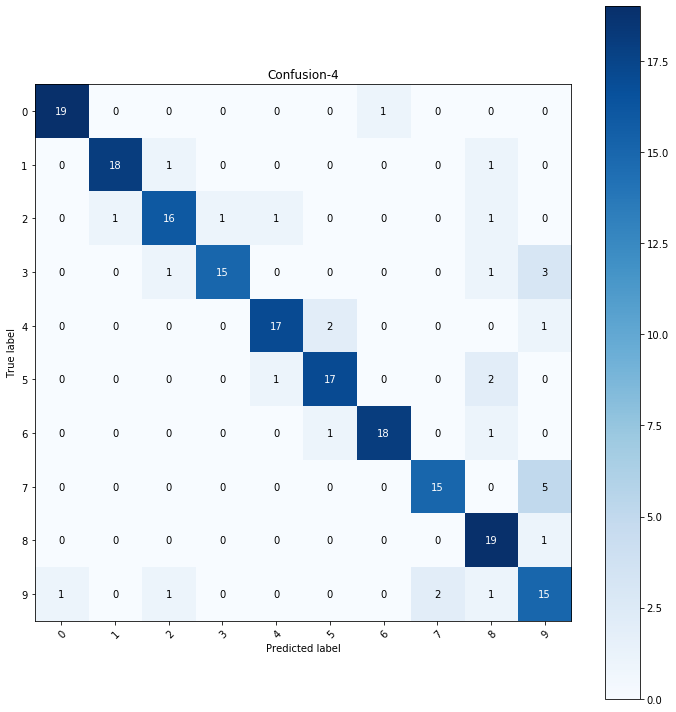

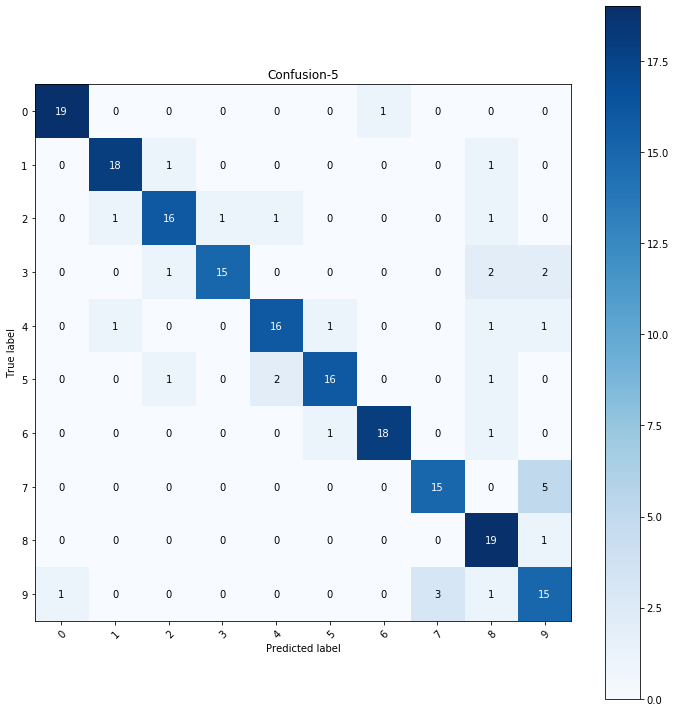

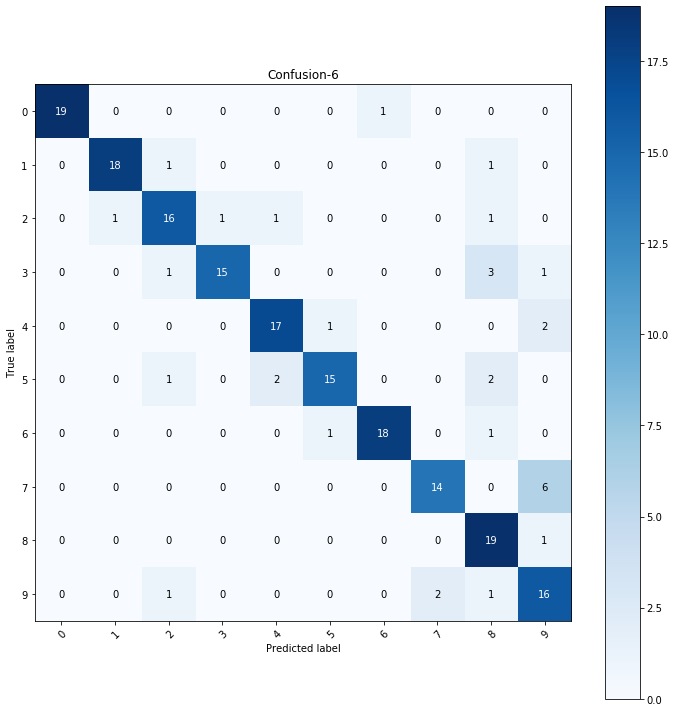

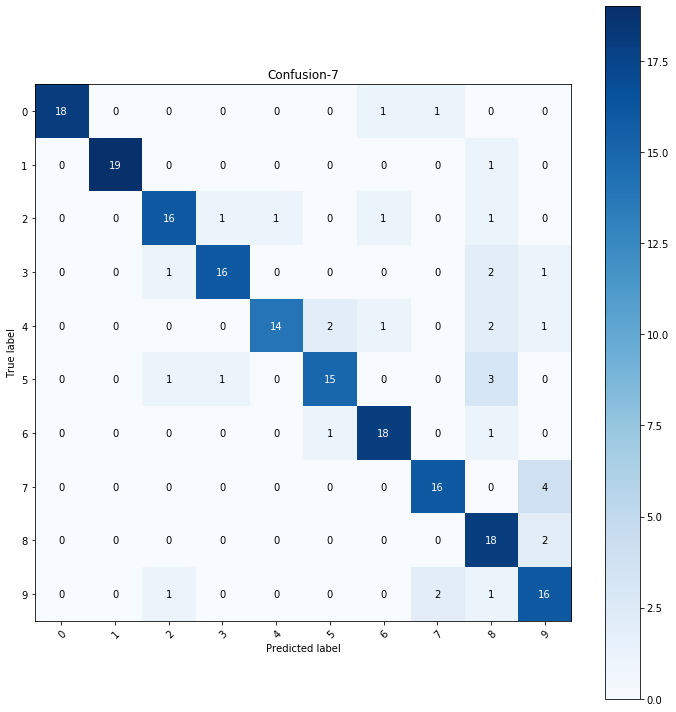

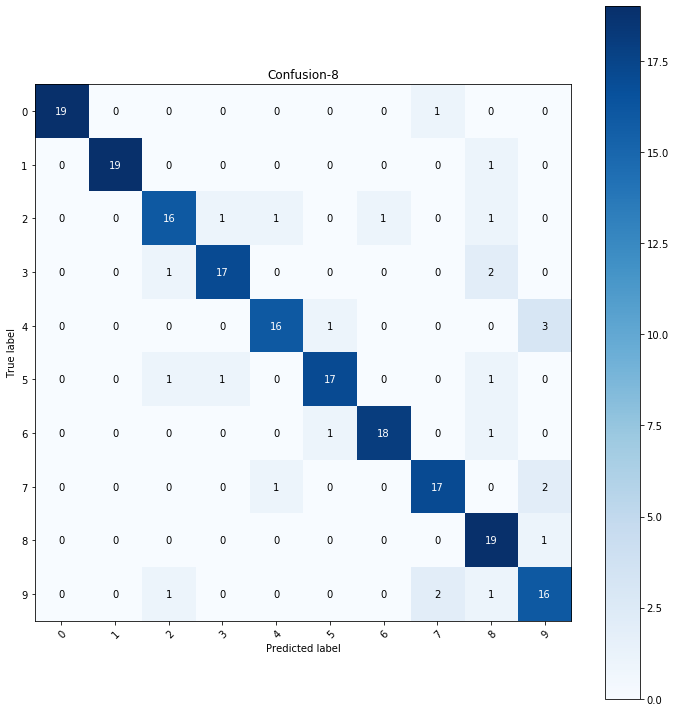

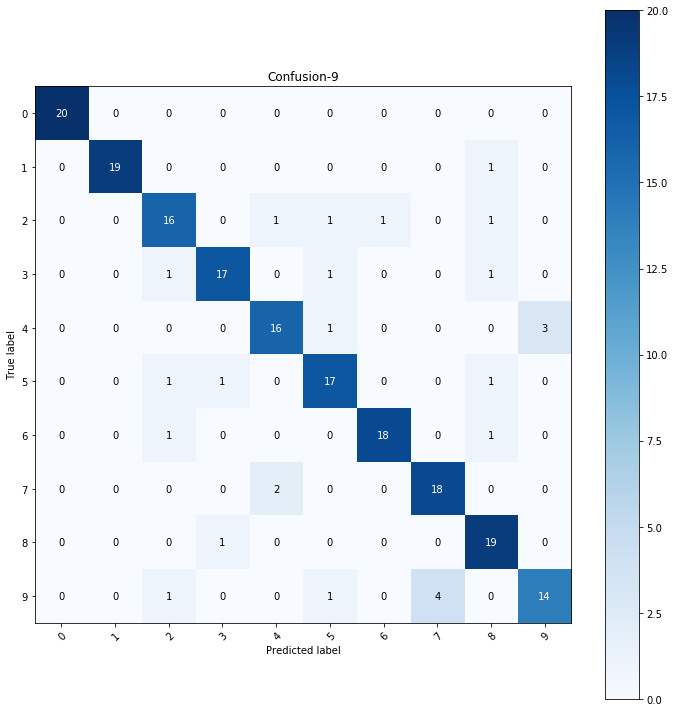

In [13]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# get the confusion matrix for each classifier
for i in range(0, 10):
    predicted_labels = classify(x_test, classifiers[i])
    cm = get_cm(true_labels, predicted_labels)
    plot_cm(cm, classes, 'Confusion-'+str(i)+'.jpg')
    
    